Sugandha Sharma, Sept 16, 2019

## Leaky Integrate and Fire neuron model

### Constant Input current and constant conductance

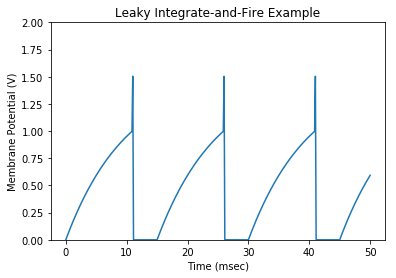

In [1]:
from numpy import *
from pylab import *
%matplotlib inline

## setup parameters and state variables
T = 50       # total time to simulate (msec)
dt = 0.125   # simulation time step (msec)
time = arange(0, T+dt, dt) # time array
t_rest = 0   # initial refractory time

## LIF properties
Vm = zeros(len(time))    # potential (V) trace over time
Rm = 1         # resistance (kOhm)
Cm = 10        # capacitance (uF)
tau_m = Rm*Cm  # time constant (msec)
tau_ref = 4    # refractory period (msec)
Vth = 1        # spike threshold (V)
V_spike = 0.5  # spike delta (V)

## Input stimulus
I = 1.5   # input current (A)

## iterate over each time step
for i, t in enumerate(time):
    if t > t_rest:
        Vm[i] = Vm[i-1] + (-Vm[i-1] + I*Rm) / tau_m * dt
        if Vm[i] >= Vth:
            Vm[i] += V_spike
            t_rest = t + tau_ref
    
## plot membrane potential trace
plot(time, Vm)
title('Leaky Integrate-and-Fire Example')
ylabel('Membrane Potential (V)')
xlabel('Time (msec)')
ylim([0,2])
show()

### Sinusoidal input current and constant conductance

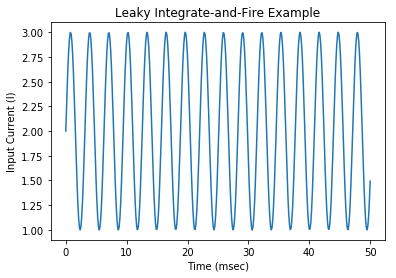

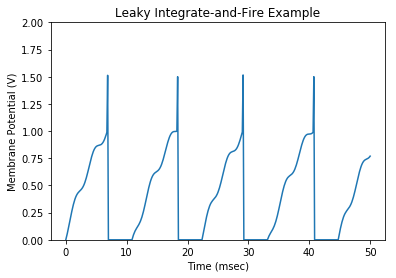

In [2]:
import numpy

## setup parameters and state variables
T = 50       # total time to simulate (msec)
dt = 0.125   # simulation time step (msec)
time = arange(0, T+dt, dt) # time array
t_rest = 0   # initial refractory time

## LIF properties
Vm = zeros(len(time))    # potential (V) trace over time
Im = zeros(len(time))    # current (I) trace over time
Rm = 1         # resistance (kOhm)
Cm = 10        # capacitance (uF)
tau_m = Rm*Cm  # time constant (msec)
tau_ref = 4    # refractory period (msec)
Vth = 1        # spike threshold (V)
V_spike = 0.5  # spike delta (V)


## iterate over each time step
for i, t in enumerate(time):
    I = sin(2*t) + 2
    Im[i] = I
    if t > t_rest:
        Vm[i] = Vm[i-1] + (-Vm[i-1] + I*Rm) / tau_m * dt
        if Vm[i] >= Vth:
            Vm[i] += V_spike
            t_rest = t + tau_ref

            
## plot input current
plot(time, Im)
title('Leaky Integrate-and-Fire Example')
ylabel('Input Current (I)')
xlabel('Time (msec)')
#ylim([0,2])
show()

## plot membrane potential trace
plot(time, Vm)
title('Leaky Integrate-and-Fire Example')
ylabel('Membrane Potential (V)')
xlabel('Time (msec)')
ylim([0,2])
show()

### Randomly varying input current and constant conductance

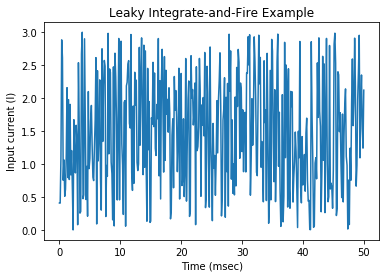

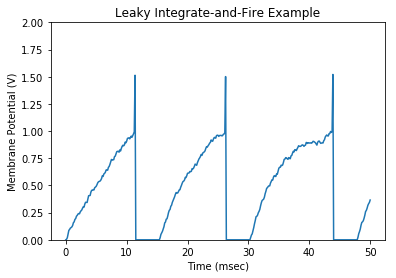

In [3]:
import numpy

## setup parameters and state variables
T = 50       # total time to simulate (msec)
dt = 0.125   # simulation time step (msec)
time = arange(0, T+dt, dt) # time array
t_rest = 0   # initial refractory time

## LIF properties
Vm = zeros(len(time))    # potential (V) trace over time
Im = zeros(len(time))    # current (I) trace over time
Rm = 1         # resistance (kOhm)
Cm = 10        # capacitance (uF)
tau_m = Rm*Cm  # time constant (msec)
tau_ref = 4    # refractory period (msec)
Vth = 1        # spike threshold (V)
V_spike = 0.5  # spike delta (V)

## Input stimulus
#mean=0
#std=1
#num_samples=1000
#samples = numpy.random.normal(mean, std, size=num_samples)

## iterate over each time step
for i, t in enumerate(time):
    I = 3*numpy.random.random()   # random input between [0,3)
    Im[i] = I
    if t > t_rest:
        Vm[i] = Vm[i-1] + (-Vm[i-1] + I*Rm) / tau_m * dt
        if Vm[i] >= Vth:
            Vm[i] += V_spike
            t_rest = t + tau_ref

            
## plot input current
plot(time, Im)
title('Leaky Integrate-and-Fire Example')
ylabel('Input current (I)')
xlabel('Time (msec)')
#ylim([0,2])
show()

## plot membrane potential trace
plot(time, Vm)
title('Leaky Integrate-and-Fire Example')
ylabel('Membrane Potential (V)')
xlabel('Time (msec)')
ylim([0,2])
show()

## Coupled linear rate based neurons

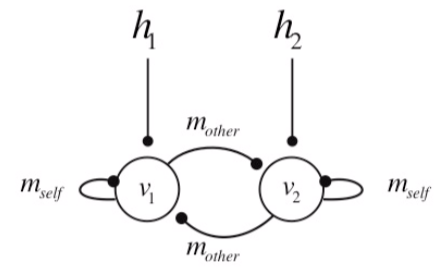

In [4]:
from IPython.display import Image
Image(filename='coupled_neurons.png')

 #### Equations describing the above network:
 
 $\large{\mathbf{M}} = \left( {\begin{array}{*{20}{c}}
  {{m_{self}}}&{{m_{other}}} \\ 
  {{m_{other}}}&{{m_{self}}} 
\end{array}} \right)\;\;\;\vec v = \left( {\begin{array}{*{20}{c}}
  {{v_1}} \\ 
  {{v_2}} 
\end{array}} \right)\;\;\;\vec h = \left( {\begin{array}{*{20}{c}}
  {{h_1}} \\ 
  {{h_2}} 
\end{array}} \right) \\
  {\mathbf{I}} = \left( {\begin{array}{*{20}{c}}
  1&0 \\ 
  0&1 
\end{array}} \right) \\
  \large{\tau _n}\frac{{d{v_1}}}{{dt}} =  - {v_1} + {m_{self}}{v_1} + {m_{other}}{v_2} + {h_1}  \\
  \large{\tau _n}\frac{{d{v_2}}}{{dt}} =  - {v_2} + {m_{self}}{v_2} + {m_{other}}{v_1} + {h_2} \\
  \large{\tau _n}\frac{{d\overrightarrow v }}{{dt}} =  - \vec v + {\mathbf{M}}\vec v + \vec h =  - {\mathbf{I}}\vec v\; + {\mathbf{M}}\vec v + \vec h = ({\mathbf{M}} - {\mathbf{I}})\vec v + \vec h \\\ $


#### Eigenvectors and eigenvalues of the connectivity matrix:

The recurrent connectivity matrix $\mathbf{M}$ of the above network, is a special case of symmetric matrices. The eigenvectors ($\widehat {{f_1}}$) of this matrix are the columns of a rotation matrix ( Φ ) at 45 degrees counter clockwise:

$\large\widehat {{f_1}} = \frac{1}{{\sqrt 2 }}\left( {\begin{array}{*{20}{c}}
  1 \\ 
  1 
\end{array}} \right)\;\;\;\widehat {{f_2}} = \frac{1}{{\sqrt 2 }}\left( {\begin{array}{*{20}{r}}
  { - 1} \\ 
  1 
\end{array}} \right)\;\;\ $


Since the matrix is symmetric and diagaonal elements are equal (and non zero).

$\large{\mathbf{M}}\widehat {{f_1}} = \left( {\begin{array}{*{20}{c}}
  {{m_{self}} + {m_{other}}} \\ 
  {{m_{self}} + {m_{other}}} 
\end{array}} \right) = {\lambda _1}\left( {\begin{array}{*{20}{c}}
  1 \\ 
  1 
\end{array}} \right) \Rightarrow {\lambda _1} = {m_{self}} + {m_{other}}$

$\large{\mathbf{M}}\widehat {{f_2}} = \left( {\begin{array}{*{20}{c}}
  { - {m_{self}} + {m_{other}}} \\ 
  { - {m_{other}} + {m_{self}}} 
\end{array}} \right) = {\lambda _2}\left( {\begin{array}{*{20}{c}}
  { - 1} \\ 
  1 
\end{array}} \right) \Rightarrow {\lambda _2} = {m_{self}} - {m_{other}}$


#### Re-writing input vector $\vec h$ as a linear combination of the eigenvectors

$  \large\vec h = \left( {\begin{array}{*{20}{c}}
  {{h_1}} \\ 
  {{h_2}} 
\end{array}} \right) = {b_1}\frac{1}{{\sqrt 2 }}\left( {\begin{array}{*{20}{c}}
  1 \\ 
  1 
\end{array}} \right) + {b_2}\frac{1}{{\sqrt 2 }}\left( {\begin{array}{*{20}{c}}
  { - 1} \\ 
  1 
\end{array}} \right)  \\
 \large \left( {\begin{array}{*{20}{c}}
  {{h_1}} \\ 
  {{h_2}} 
\end{array}} \right) = \left( {\begin{array}{*{20}{c}}
  {\frac{{{b_1} - {b_2}}}{{\sqrt 2 }}} \\ 
  {\frac{{{b_1} + {b_2}}}{{\sqrt 2 }}} 
\end{array}} \right)  \\
  \large{h _{common}} = \frac{{\sqrt 2 }}{2}\left( {{h_1} + {h_2}} \right) = \frac{{\left( {{b_1} - {b_2} + {b_1} + {b_2}} \right)}}{2} = \frac{{2{b_1}}}{2} = {b_1}  \\
  \large{h _{diff}} = \frac{{\sqrt 2 }}{2}\left( {{h_2} - {h_1}} \right) = \frac{{\left( {{b_1} + {b_2} - {b_1} + {b_2}} \right)}}{2} = \frac{{2{b_2}}}{2} = {b_2} \\ $

### Model of selective amplification of differences between inputs

Suppose that each neuron excites itself by setting $m_{self}$ to 0.2 and inhibits the other neuron ($m_{other} = -0.7$). Furthermore, assume that this network receives the following input vector, $\vec h$(t ≥ 0) = (117,123)Hz.

Then the eigenvalues of the network are given by:

$\large{\lambda _1} = {m_{self}} + {m_{other}} = 0.2 + ( - 0.7) =  - 0.5  \small \Rightarrow {\text{attenuated}}\\
 \large{\lambda _2} = {m_{self}} - {m_{other}} = 0.2 - ( - 0.7) = 0.9  \small \Rightarrow {\text{amplified}}\ \\ $
 
 
Common input associated with first eigenvector (${b_1}$) and since $|m_{other}|>m_{self}$ the eigenvalue for this eigenvector would be negative and hence common input would be attenuated.

Following the same logic opposite inputs associated with second eigenvector (${b_2}$) and in this case the eigenvalue is positive, hence opposite input is amplified by this network.

#### Gain factors for each mode (eigenvector) of the network

 $ \large{g_1} = \frac{1}{{1 - {\lambda _1}}} = \frac{1}{{1 - ( - 0.5)}} = \frac{2}{3}  \\
  \large{g_2} = \frac{1}{{1 - {\lambda _2}}} = \frac{1}{{1 - 0.9}} = 10  \\ $
  

#### Effective time constants for each mode (eigenvector) of the network 

Assuming that each cell in the network has an intrinsic time constant ${\tau _n}$ of 18ms.

$\large{\tau _1} = {\tau _n}{g_1} = \frac{{2{\tau _n}}}{3} = 12{\text{ms}} \Rightarrow {\text{faster}}  \\
 \large {\tau _2} = {\tau _n}{g_2} = 10{\tau _n} = 180{\text{ms}} \Rightarrow {\text{slower}} \ \\ $
 
 The attenuated mode changes much more rapidly than the amplified mode.

#### Differential equations describing the response of mode activity to the input $\vec h$

  $\large{\tau _n}\frac{{d{c_1}}}{{dt}} =  - (1 - {\lambda _1}){c_1} + \vec h \cdot \widehat {{f_1}}  \\
  \large{\tau _n}\frac{{d{c_2}}}{{dt}} =  - (1 - {\lambda _2}){c_2} + \vec h \cdot \widehat {{f_2}}  \\ $

$\large{b_1} = { h_{common}} = \frac{{\sqrt 2 }}{2}\left( {{h_1} + {h_2}} \right) \propto \vec h \cdot \widehat {{f_1}}$

i.e. is proportional to dot product of input with first eigenvector. Therefore is a measure of the input orthogonal projection onto the first eigenvector, and hence a measure of node $c_1$ activation.

$\large{b_2} = { h_{diff}} = \frac{{\sqrt 2 }}{2}\left( {{h_2} - {h_1}} \right) \propto \vec h \cdot \widehat {{f_2}}$

i.e. is proportional to dot product of input with second eigenvector. Therefore is a measure of the input orthogonal projection onto the second eigenvector, and hence a measure of node $c_2$ activation.

#### Steady state activity of the two neurons

$\large{\vec v_\infty } = \frac{{{b_1}}}{{1 - {\lambda _1}}}\widehat {{f_1}} + \frac{{{b_2}}}{{1 - {\lambda _2}}}\widehat {{f_2}} = \left( {\begin{array}{*{20}{c}}
  {50} \\ 
  {110} 
\end{array}} \right)\;{\text{Hz}}\ $


In [5]:
import numpy as np
import pdb; 
#pdb.set_trace()


def IntegrateEuler(M,h,ton,toff,T,dt, tau):
    N = np.ceil (T/dt)
    t = np.linspace(0, (N-1)*dt, N)
    V = np.zeros((2,int(N)))
    input = np.zeros((2,int(N)))
    
    indices = [idx for idx in range(len(t)) if t[idx] >= ton and t[idx] <= toff]
    input[0, indices] = h[0]
    input[1, indices] = h[1]
    
    I = np.eye(2)
    for idt in np.arange(1, N, 1):
        dVdt = (np.dot((M-I), V[:,int(idt)-1]) + input[:,int(idt)-1]) / tau;
        V[:,int(idt)] = dVdt * dt + V[:,int(idt)-1];
    return t,V    


In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

# Recurrent matrix
M = np.ndarray((2,2))
M[0,0] = M[1,1] = 0.2
M[1,0] = M[0,1] = -0.7

# Integration
dt = .1;   # in msec
tau = 18;  # in msec
T = 1000;  # in msec 

# input vector
h = [[117], [123]]; # constant input in Hz
ton = 0;
toff = T;

# Rotation Matrix
P = np.divide([[1, -1], [1, 1]], np.sqrt(2));

[t,V] = IntegrateEuler(M,h,ton,toff,T,dt, tau);


/Users/sugandha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  if __name__ == '__main__':


Text(0.5, 1.0, 'State space trajectory')

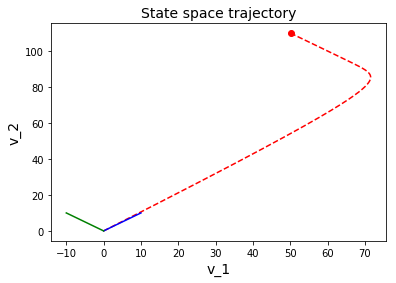

In [7]:
plt.figure()
plt.plot(V[0,:], V[1,:], 'r--')
plt.plot(V[0, V.shape[1]-1], V[1, V.shape[1]-1], 'ro')
plt.plot([0, 10], [0,  10], 'b-')
plt.plot([0, -10], [0, 10], 'g-')

plt.xlabel('v_1', fontsize=14)
plt.ylabel('v_2', fontsize=14);
plt.title ('State space trajectory', fontsize=14)

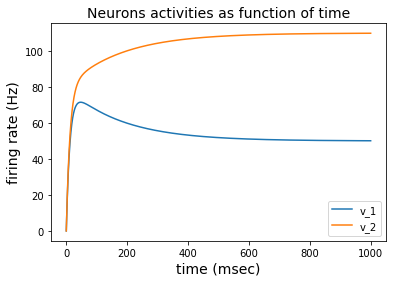

In [8]:
plt.figure()
plt.plot(t, V[0,:], label='v_1')
plt.plot(t, V[1,:], label='v_2')
plt.legend()
plt.xlabel('time (msec)', fontsize=14)
plt.ylabel('firing rate (Hz)', fontsize=14)
plt.title ('Neurons activities as function of time', fontsize=14)
plt.show()

Text(0.5, 1.0, 'modes activities as a function of time')

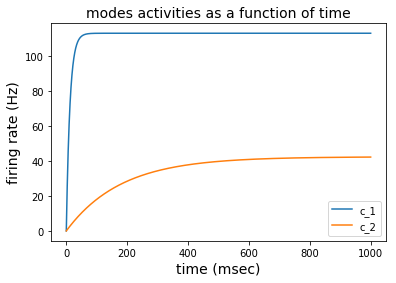

In [9]:
# modes activity
c = np.dot(np.transpose(P), V)

plt.figure()
plt.plot(t, c[0], label='c_1')
plt.plot(t, c[1], label='c_2')
plt.xlabel('time (msec)', fontsize=14)
plt.ylabel('firing rate (Hz)', fontsize=14);
plt.legend()
plt.title ('modes activities as a function of time', fontsize=14)

### Model of neuronal integration

Let's set mode 2 with eigen value = 1

${\lambda _2} = {m_{self}} - {m_{other}} = 1 \\
  1 = 0.2 - {m_{other}} \Rightarrow {m_{ohter}} = 0.8 $


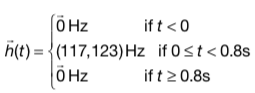

In [10]:
# time varying input
from IPython.display import Image
Image(filename='input.png')

/Users/sugandha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  if __name__ == '__main__':


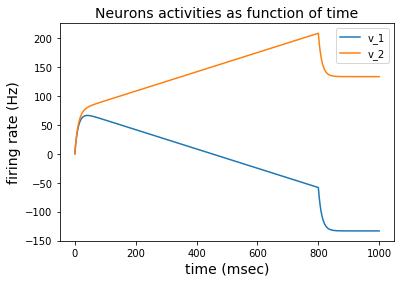

In [11]:
# Recurrent matrix

M2 = [[0.2, -0.8], [-0.8, 0.2]]  # definig matrix M2 for integration model
toff = 800;

[t, V]=IntegrateEuler(M2,h,ton,toff,T,dt,tau);

plt.figure
plt.plot(t, V[0,:], label='v_1')
plt.plot(t, V[1,:], label='v_2')
plt.legend()
plt.xlabel('time (msec)', fontsize=14)
plt.ylabel('firing rate (Hz)', fontsize=14)
plt.title ('Neurons activities as function of time', fontsize=14)
plt.show()

Text(0.5, 1.0, 'modes activities as a function of time')

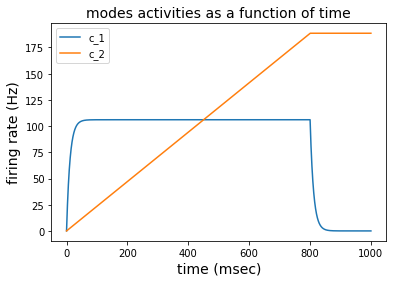

In [12]:
# modes activity
c = np.dot(np.transpose(P), V)

plt.figure()
plt.plot(t, c[0], label='c_1')
plt.plot(t, c[1], label='c_2')
plt.xlabel('time (msec)', fontsize=14)
plt.ylabel('firing rate (Hz)', fontsize=14);
plt.legend()
plt.title ('modes activities as a function of time', fontsize=14)

#### Node $c_2$ remians at fixed level without decaying to 0 after the stimulus is turned off. This shows that $c_2$ is an integrating mode

### Show that the previous model did not do any integration

/Users/sugandha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  if __name__ == '__main__':


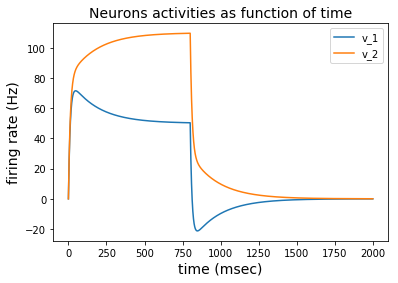

In [13]:
T = 2000;  # in msec 

[t, V]=IntegrateEuler(M,h,ton,toff,T,dt,tau)  # using matrix M from the previous model

plt.figure
plt.plot(t, V[0,:], label='v_1')
plt.plot(t, V[1,:], label='v_2')
plt.legend()
plt.xlabel('time (msec)', fontsize=14)
plt.ylabel('firing rate (Hz)', fontsize=14)
plt.title ('Neurons activities as function of time', fontsize=14)
plt.show()

Text(0.5, 1.0, 'modes activities as a function of time')

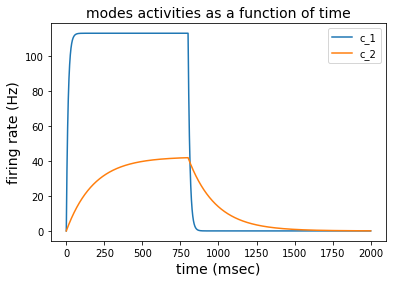

In [14]:
# modes activity
c = np.dot(np.transpose(P), V)

plt.figure()
plt.plot(t, c[0], label='c_1')
plt.plot(t, c[1], label='c_2')
plt.xlabel('time (msec)', fontsize=14)
plt.ylabel('firing rate (Hz)', fontsize=14);
plt.legend()
plt.title ('modes activities as a function of time', fontsize=14)

#### In this case both nodes decay back to 0 after the stimulus is turned off. This network does not exhibit memory.